In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [30]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(10),       
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32

# Load the train dataset
train_dataset = ImageFolder('/kaggle/input/cat-and-dog/training_set/training_set', transform=train_transform)
test_dataset = ImageFolder('/kaggle/input/cat-and-dog/test_set/test_set', transform=val_transform)

# Calculate the size of training and validation sets
total_train = len(train_dataset)
train_size = int(0.8 * total_train)
val_size = total_train - train_size

# Split the dataset into training and validation sets
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
unique_classes = set()

for images, labels in val_loader:
    unique_classes.update(labels.tolist())

print("Unique classes in val_loader:", unique_classes)
unique_classes = set()

for images, labels in train_loader:
    unique_classes.update(labels.tolist())

print("Unique classes in train_loader:", unique_classes)

for images, labels in test_loader:
    unique_classes.update(labels.tolist())

print("Unique classes in test_loader:", unique_classes)


Unique classes in val_loader: {0, 1}
Unique classes in train_loader: {0, 1}
Unique classes in test_loader: {0, 1}


In [4]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random
import warnings
warnings.filterwarnings("ignore")

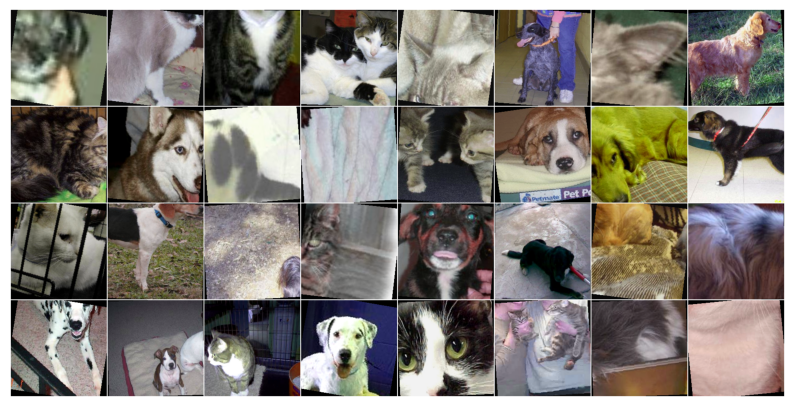

Dog   Cat   Cat   Cat   Cat   Dog   Cat   Dog   Cat   Dog   Cat   Dog   Cat   Dog   Dog   Dog   Cat   Dog   Dog   Cat   Dog   Dog   Cat   Cat   Dog   Dog   Cat   Dog   Cat   Cat   Cat   Cat  


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def imshow(image, classes):
    image = image / 2 + 0.5
    npimg = image.numpy()
    plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # Turn off axis
    plt.subplots_adjust(wspace=1, hspace=1)  # Adjust spacing between subplots
    plt.show()

classes = ['Cat', 'Dog']
images, labels = next(iter(train_loader))

# Adjust the pad_value to set the spacing between images
imshow(torchvision.utils.make_grid(images, pad_value=1), classes)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

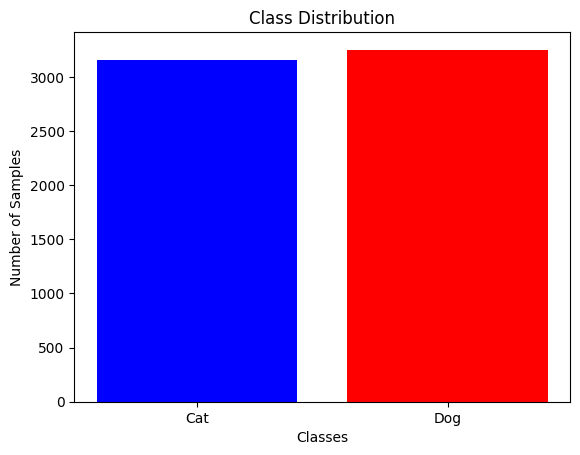

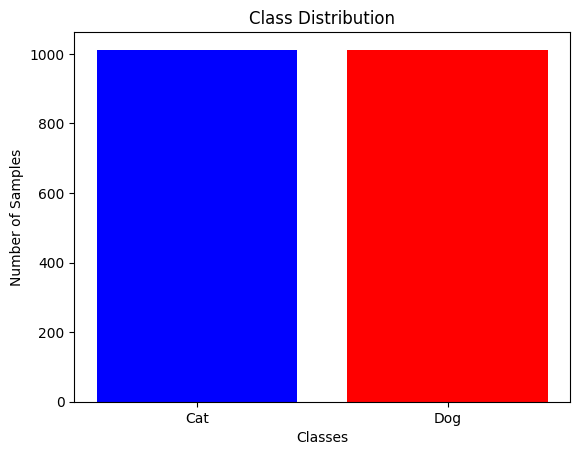

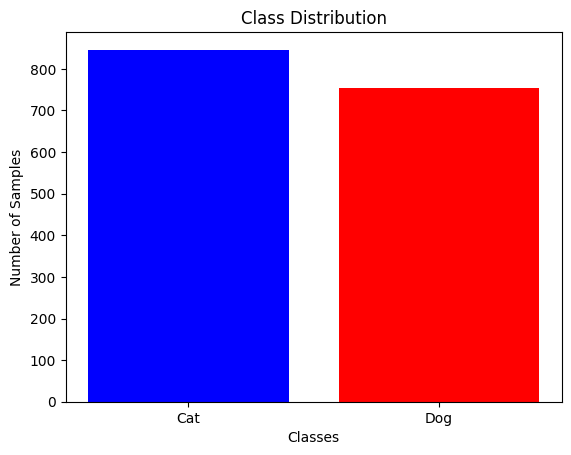

In [6]:
import matplotlib.pyplot as plt

def plot_class_distribution(dataset, classes):
    class_counts = {class_name: 0 for class_name in classes}
    
    # Count the number of samples for each class in the entire dataset
    for _, label in dataset:
        class_counts[classes[label]] += 1
    
    # Sort classes alphabetically for consistent plotting
    sorted_classes = sorted(classes)
    colors = ['blue','red']
    # Plot the bar chart
    plt.bar(sorted_classes, [class_counts[class_name] for class_name in sorted_classes], color=colors)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()

# Example usage:
# Assuming 'train_dataset' is your training dataset and 'classes' is a list containing the class names
plot_class_distribution(train_dataset, classes)
plot_class_distribution(test_dataset, classes)
plot_class_distribution(val_dataset, classes)


In [13]:
#b-32 lr = 0.01
import torch
import torch.nn as nn  
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Additional convolutional layers
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)



train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    # Validation phase
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    with torch.no_grad():
        for images, labels in val_loader:
            

            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    # Testing phase
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    # Store losses and accuracies
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

# Print final test accuracy
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 403601.8881, Train Acc: 0.5031, Val Loss: 1.0780, Val Acc: 0.4878
Epoch 2/10, Train Loss: 1.4734, Train Acc: 0.4964, Val Loss: 29.2892, Val Acc: 0.5116
Epoch 3/10, Train Loss: 2.2666, Train Acc: 0.5061, Val Loss: 0.7334, Val Acc: 0.4903
Epoch 4/10, Train Loss: 1.4875, Train Acc: 0.5014, Val Loss: 0.7950, Val Acc: 0.4903
Epoch 5/10, Train Loss: 32.1686, Train Acc: 0.4977, Val Loss: 0.6936, Val Acc: 0.4909
Epoch 6/10, Train Loss: 0.7581, Train Acc: 0.4925, Val Loss: 0.7305, Val Acc: 0.5091
Epoch 7/10, Train Loss: 0.7486, Train Acc: 0.5037, Val Loss: 0.6995, Val Acc: 0.5091
Epoch 8/10, Train Loss: 0.7422, Train Acc: 0.5030, Val Loss: 0.7880, Val Acc: 0.4909
Epoch 9/10, Train Loss: 0.7436, Train Acc: 0.5086, Val Loss: 0.7680, Val Acc: 0.4909
Epoch 10/10, Train Loss: 0.7253, Train Acc: 0.5092, Val Loss: 0.7222, Val Acc: 0.5091
Final Test Loss: 3.4692, Final Test Acc: 0.4998


In [14]:
#b-32 lr-0.001
import torch
import torch.nn as nn  
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Additional convolutional layers
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.sigmoid(self.fc2(x))  
        return x

# Instantiate the model
model = SimpleCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    # Validation phase
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    with torch.no_grad():
        for images, labels in val_loader:
            

            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    # Testing phase
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    # Store losses and accuracies
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

# Print final test accuracy
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6937, Train Acc: 0.5067, Val Loss: 0.6794, Val Acc: 0.5409
Epoch 2/10, Train Loss: 0.6793, Train Acc: 0.5667, Val Loss: 0.6720, Val Acc: 0.5696
Epoch 3/10, Train Loss: 0.6502, Train Acc: 0.6232, Val Loss: 0.6439, Val Acc: 0.6296
Epoch 4/10, Train Loss: 0.6419, Train Acc: 0.6349, Val Loss: 0.6320, Val Acc: 0.6477
Epoch 5/10, Train Loss: 0.6320, Train Acc: 0.6465, Val Loss: 0.6387, Val Acc: 0.6452
Epoch 6/10, Train Loss: 0.6184, Train Acc: 0.6683, Val Loss: 0.6366, Val Acc: 0.6608
Epoch 7/10, Train Loss: 0.6117, Train Acc: 0.6754, Val Loss: 0.6184, Val Acc: 0.6721
Epoch 8/10, Train Loss: 0.6084, Train Acc: 0.6755, Val Loss: 0.6324, Val Acc: 0.6752
Epoch 9/10, Train Loss: 0.6061, Train Acc: 0.6736, Val Loss: 0.6498, Val Acc: 0.6127
Epoch 10/10, Train Loss: 0.6060, Train Acc: 0.6772, Val Loss: 0.6182, Val Acc: 0.6802
Final Test Loss: 0.5771, Final Test Acc: 0.7123


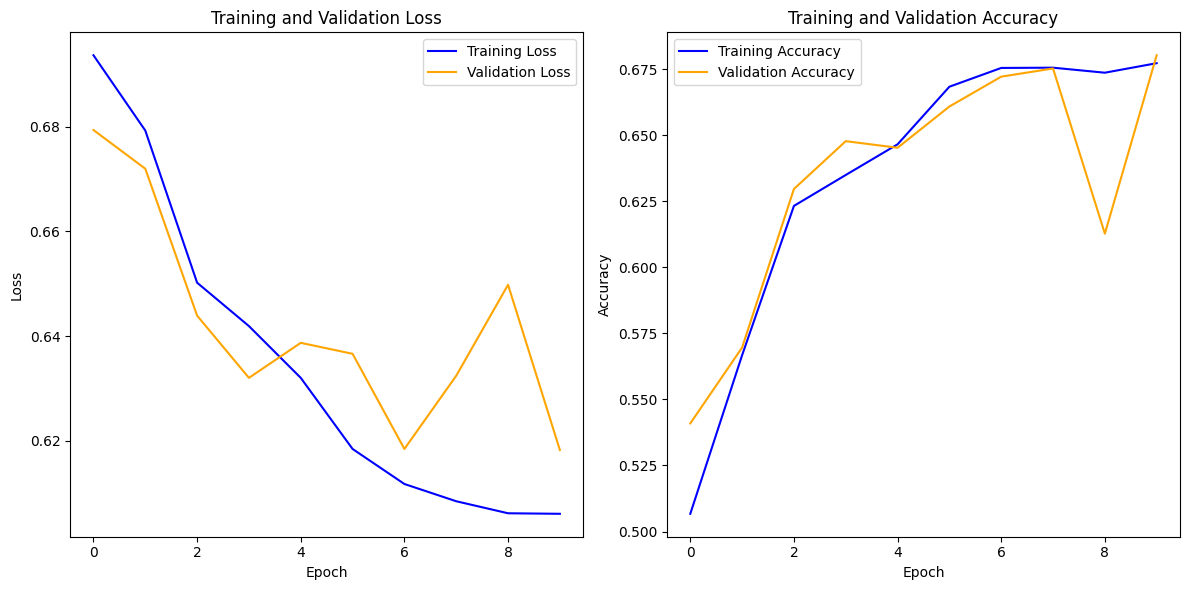

In [14]:
train_losses = [0.6937, 0.6793, 0.6502, 0.6419, 0.6320, 0.6184, 0.6117, 0.6084, 0.6061, 0.6060]
val_losses = [0.6794, 0.6720, 0.6439, 0.6320, 0.6387, 0.6366, 0.6184, 0.6324, 0.6498, 0.6182]

train_accuracies = [0.5067, 0.5667, 0.6232, 0.6349, 0.6465, 0.6683, 0.6754, 0.6755, 0.6736, 0.6772]
val_accuracies = [0.5409, 0.5696, 0.6296, 0.6477, 0.6452, 0.6608, 0.6721, 0.6752, 0.6127, 0.6802]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
#b-32 lr=0.0001

import torch
import torch.nn as nn  
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Additional convolutional layers
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.sigmoid(self.fc2(x))  # Applying sigmoid activation
        return x

# Instantiate the model
model = SimpleCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    # Validation phase
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    with torch.no_grad():
        for images, labels in val_loader:
            

            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    # Testing phase
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    # Store losses and accuracies
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6843, Train Acc: 0.5456, Val Loss: 0.6637, Val Acc: 0.6127
Epoch 2/10, Train Loss: 0.6650, Train Acc: 0.5974, Val Loss: 0.6553, Val Acc: 0.6277
Epoch 3/10, Train Loss: 0.6455, Train Acc: 0.6293, Val Loss: 0.6381, Val Acc: 0.6390
Epoch 4/10, Train Loss: 0.6291, Train Acc: 0.6479, Val Loss: 0.6231, Val Acc: 0.6690
Epoch 5/10, Train Loss: 0.6201, Train Acc: 0.6646, Val Loss: 0.6138, Val Acc: 0.6683
Epoch 6/10, Train Loss: 0.6055, Train Acc: 0.6824, Val Loss: 0.6327, Val Acc: 0.6640
Epoch 7/10, Train Loss: 0.6019, Train Acc: 0.6866, Val Loss: 0.6197, Val Acc: 0.6746
Epoch 8/10, Train Loss: 0.5947, Train Acc: 0.6918, Val Loss: 0.5983, Val Acc: 0.6921
Epoch 9/10, Train Loss: 0.5954, Train Acc: 0.6928, Val Loss: 0.5970, Val Acc: 0.7171
Epoch 10/10, Train Loss: 0.5859, Train Acc: 0.7067, Val Loss: 0.6012, Val Acc: 0.6883
Final Test Loss: 0.6423, Final Test Acc: 0.6322


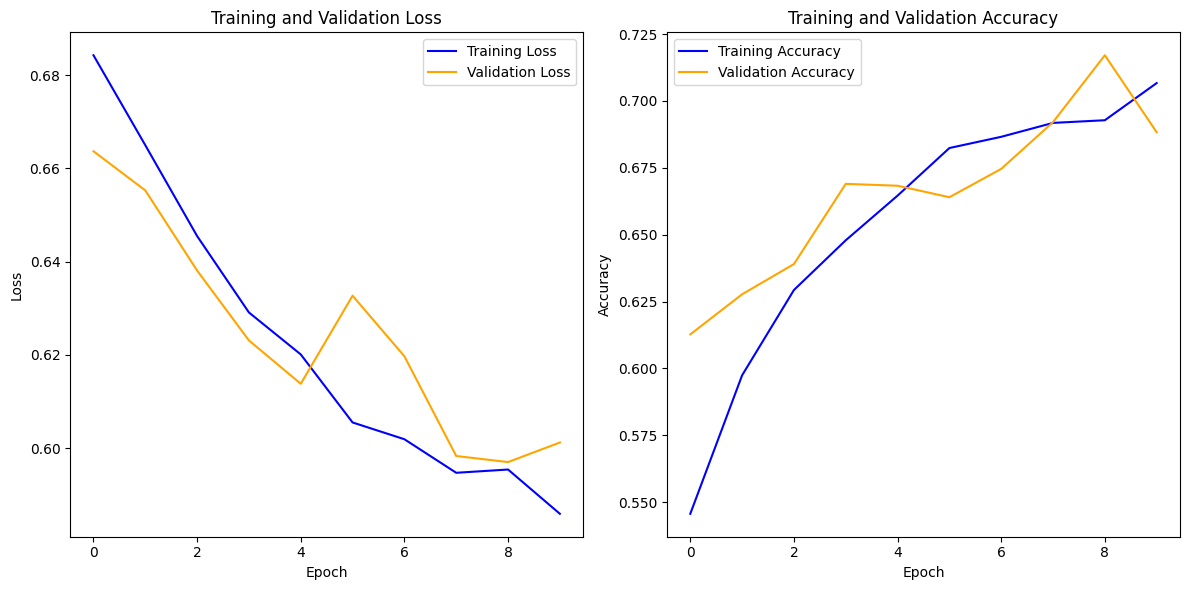

In [13]:
train_losses = [0.6843, 0.6650, 0.6455, 0.6291, 0.6201, 0.6055, 0.6019, 0.5947, 0.5954, 0.5859]
val_losses = [0.6637, 0.6553, 0.6381, 0.6231, 0.6138, 0.6327, 0.6197, 0.5983, 0.5970, 0.6012]

train_accuracies = [0.5456, 0.5974, 0.6293, 0.6479, 0.6646, 0.6824, 0.6866, 0.6918, 0.6928, 0.7067]
val_accuracies = [0.6127, 0.6277, 0.6390, 0.6690, 0.6683, 0.6640, 0.6746, 0.6921, 0.7171, 0.6883]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
#rmsprop

import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the SimpleCNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=1):  
        super(SimpleCNN, self).__init__()
        # Define the layers of the model
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Additional convolutional layers
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)  
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Define the forward pass of the model
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.sigmoid(self.fc2(x))  
        return x


model = SimpleCNN().to(device)


criterion = nn.BCELoss()  
optimizer = optim.RMSprop(model.parameters(), lr=0.001)  

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        labels = labels.unsqueeze(1).float() 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    # Validation phase
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            labels = labels.unsqueeze(1).float()  
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    # Testing phase
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            labels = labels.unsqueeze(1).float()  
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    # Store losses and accuracies
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 49.1483, Train Acc: 0.5070, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 2/10, Train Loss: 49.3626, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 3/10, Train Loss: 49.1449, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 4/10, Train Loss: 49.3626, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 5/10, Train Loss: 49.1449, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 6/10, Train Loss: 49.3626, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 7/10, Train Loss: 49.1449, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 8/10, Train Loss: 49.2537, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 9/10, Train Loss: 49.1449, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Epoch 10/10, Train Loss: 49.3626, Train Acc: 0.5075, Val Loss: 53.7377, Val Acc: 0.4716
Final Test Loss: 49.3652, Final Test Acc: 0.5002


In [12]:
#adagrad

import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6815, Train Acc: 0.5664, Val Loss: 0.6586, Val Acc: 0.6034
Epoch 2/10, Train Loss: 0.6592, Train Acc: 0.6131, Val Loss: 0.6467, Val Acc: 0.6334
Epoch 3/10, Train Loss: 0.6368, Train Acc: 0.6368, Val Loss: 0.6907, Val Acc: 0.5815
Epoch 4/10, Train Loss: 0.6244, Train Acc: 0.6546, Val Loss: 0.6841, Val Acc: 0.5821
Epoch 5/10, Train Loss: 0.6129, Train Acc: 0.6691, Val Loss: 0.6346, Val Acc: 0.6246
Epoch 6/10, Train Loss: 0.5951, Train Acc: 0.6735, Val Loss: 0.5997, Val Acc: 0.6646
Epoch 7/10, Train Loss: 0.5950, Train Acc: 0.6838, Val Loss: 0.7399, Val Acc: 0.5640
Epoch 8/10, Train Loss: 0.5867, Train Acc: 0.6861, Val Loss: 0.5833, Val Acc: 0.6871
Epoch 9/10, Train Loss: 0.5921, Train Acc: 0.6816, Val Loss: 0.5834, Val Acc: 0.6902
Epoch 10/10, Train Loss: 0.5762, Train Acc: 0.7010, Val Loss: 0.5735, Val Acc: 0.6908
Final Test Loss: 0.5382, Final Test Acc: 0.7257


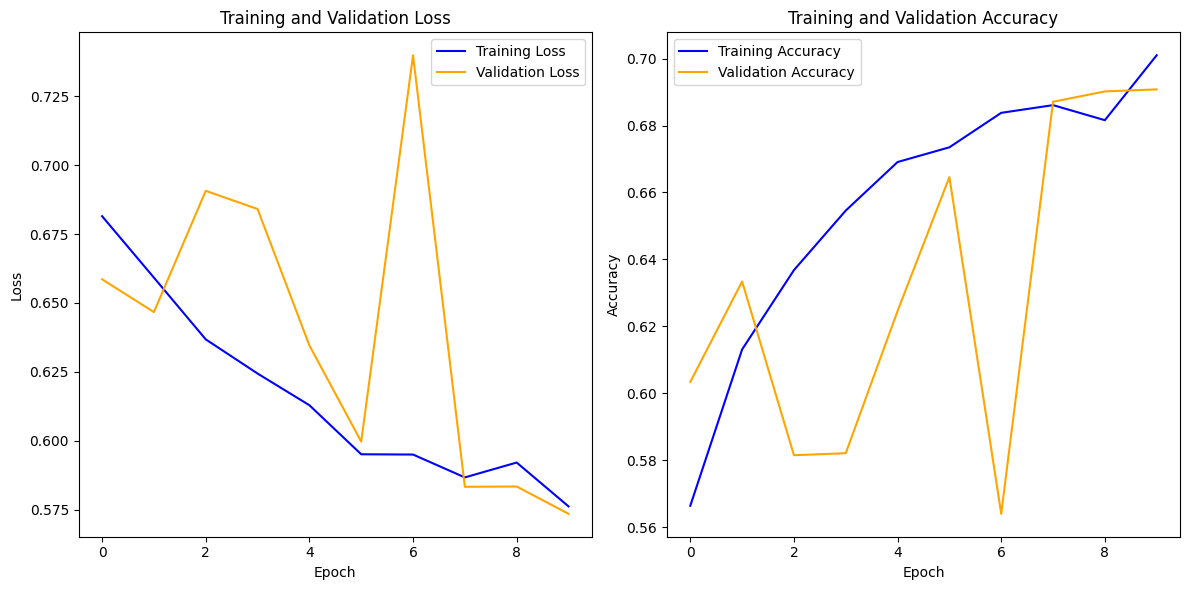

In [16]:
train_losses = [0.6815, 0.6592, 0.6368, 0.6244, 0.6129, 0.5951, 0.5950, 0.5867, 0.5921, 0.5762]
val_losses = [0.6586, 0.6467, 0.6907, 0.6841, 0.6346, 0.5997, 0.7399, 0.5833, 0.5834, 0.5735]

train_accuracies = [0.5664, 0.6131, 0.6368, 0.6546, 0.6691, 0.6735, 0.6838, 0.6861, 0.6816, 0.7010]
val_accuracies = [0.6034, 0.6334, 0.5815, 0.5821, 0.6246, 0.6646, 0.5640, 0.6871, 0.6902, 0.6908]


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
#adagrad
#ba
import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6787, Train Acc: 0.5689, Val Loss: 0.6765, Val Acc: 0.5828
Epoch 2/10, Train Loss: 0.6445, Train Acc: 0.6319, Val Loss: 0.6348, Val Acc: 0.6327
Epoch 3/10, Train Loss: 0.6228, Train Acc: 0.6566, Val Loss: 0.6953, Val Acc: 0.5753
Epoch 4/10, Train Loss: 0.6028, Train Acc: 0.6677, Val Loss: 0.7812, Val Acc: 0.5765
Epoch 5/10, Train Loss: 0.5782, Train Acc: 0.6989, Val Loss: 0.5781, Val Acc: 0.6914
Epoch 6/10, Train Loss: 0.5592, Train Acc: 0.7113, Val Loss: 0.5560, Val Acc: 0.7083
Epoch 7/10, Train Loss: 0.5587, Train Acc: 0.7049, Val Loss: 0.5910, Val Acc: 0.6808
Epoch 8/10, Train Loss: 0.5501, Train Acc: 0.7199, Val Loss: 0.5602, Val Acc: 0.7083
Epoch 9/10, Train Loss: 0.5380, Train Acc: 0.7281, Val Loss: 0.6099, Val Acc: 0.6727
Epoch 10/10, Train Loss: 0.5334, Train Acc: 0.7308, Val Loss: 0.5794, Val Acc: 0.7164
Final Test Loss: 0.5175, Final Test Acc: 0.7425


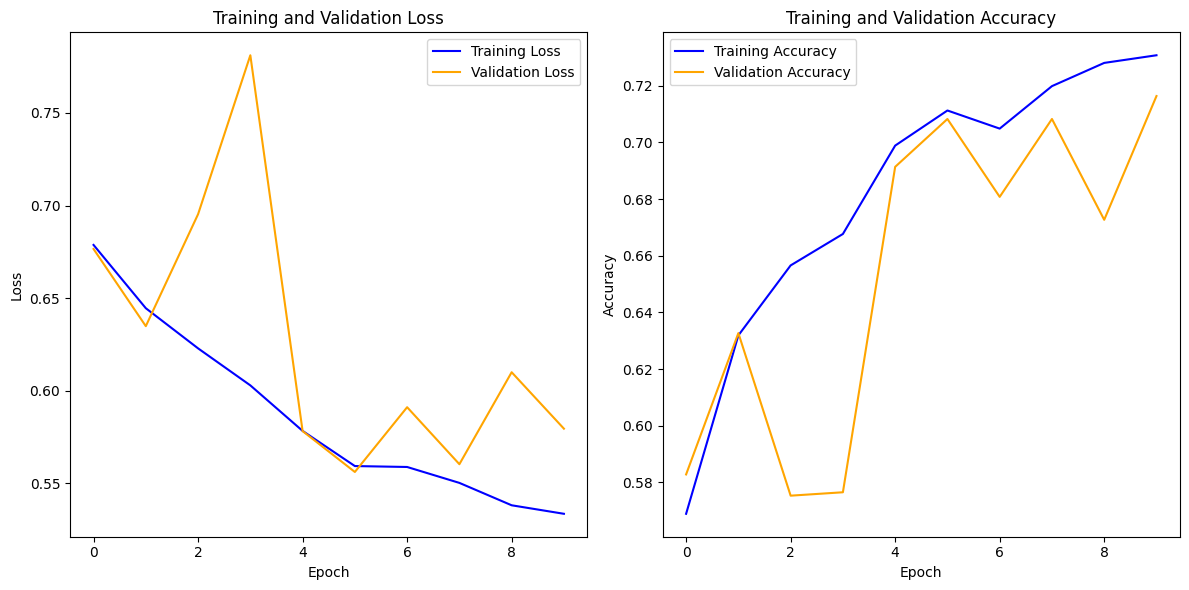

In [22]:


train_losses = [0.6787, 0.6445, 0.6228, 0.6028, 0.5782, 0.5592, 0.5587, 0.5501, 0.5380, 0.5334]
train_accuracies = [0.5689, 0.6319, 0.6566, 0.6677, 0.6989, 0.7113, 0.7049, 0.7199, 0.7281, 0.7308]
val_losses = [0.6765, 0.6348, 0.6953, 0.7812, 0.5781, 0.5560, 0.5910, 0.5602, 0.6099, 0.5794]
val_accuracies = [0.5828, 0.6327, 0.5753, 0.5765, 0.6914, 0.7083, 0.6808, 0.7083, 0.6727, 0.7164]



import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
#leakyrelu
#adagrad
#sigmoid
import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.LeakyReLU()  
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.LeakyReLU()  
        self.fc2 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)  # Apply sigmoid activation
        return x

model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6934, Train Acc: 0.4989, Val Loss: 0.6931, Val Acc: 0.4841
Epoch 2/10, Train Loss: 0.6931, Train Acc: 0.4984, Val Loss: 0.6931, Val Acc: 0.4822
Epoch 3/10, Train Loss: 0.6931, Train Acc: 0.5006, Val Loss: 0.6931, Val Acc: 0.4847
Epoch 4/10, Train Loss: 0.6931, Train Acc: 0.5019, Val Loss: 0.6931, Val Acc: 0.4847
Epoch 5/10, Train Loss: 0.6931, Train Acc: 0.5000, Val Loss: 0.6931, Val Acc: 0.4866
Epoch 6/10, Train Loss: 0.6931, Train Acc: 0.4998, Val Loss: 0.6931, Val Acc: 0.4834
Epoch 7/10, Train Loss: 0.6931, Train Acc: 0.5011, Val Loss: 0.6931, Val Acc: 0.4859
Epoch 8/10, Train Loss: 0.6931, Train Acc: 0.4998, Val Loss: 0.6931, Val Acc: 0.4834
Epoch 9/10, Train Loss: 0.6931, Train Acc: 0.5006, Val Loss: 0.6931, Val Acc: 0.4803
Epoch 10/10, Train Loss: 0.6931, Train Acc: 0.5002, Val Loss: 0.6931, Val Acc: 0.4822
Final Test Loss: 0.6931, Final Test Acc: 0.4988


In [23]:
#after removing sigmoid
import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.LeakyReLU() 
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6905, Train Acc: 0.5467, Val Loss: 0.6820, Val Acc: 0.5547
Epoch 2/10, Train Loss: 0.6527, Train Acc: 0.6162, Val Loss: 0.7103, Val Acc: 0.5253
Epoch 3/10, Train Loss: 0.6303, Train Acc: 0.6401, Val Loss: 0.6110, Val Acc: 0.6502
Epoch 4/10, Train Loss: 0.6061, Train Acc: 0.6627, Val Loss: 0.6548, Val Acc: 0.6252
Epoch 5/10, Train Loss: 0.5905, Train Acc: 0.6864, Val Loss: 0.6147, Val Acc: 0.6483
Epoch 6/10, Train Loss: 0.5787, Train Acc: 0.6941, Val Loss: 0.6944, Val Acc: 0.5978
Epoch 7/10, Train Loss: 0.5752, Train Acc: 0.6972, Val Loss: 0.5703, Val Acc: 0.6896
Epoch 8/10, Train Loss: 0.5624, Train Acc: 0.7083, Val Loss: 0.5683, Val Acc: 0.6889
Epoch 9/10, Train Loss: 0.5557, Train Acc: 0.7100, Val Loss: 0.5396, Val Acc: 0.7264
Epoch 10/10, Train Loss: 0.5503, Train Acc: 0.7211, Val Loss: 0.6763, Val Acc: 0.6102
Final Test Loss: 0.6159, Final Test Acc: 0.6693


In [24]:
#weight decay
import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.LeakyReLU() 
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001,weight_decay=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6920, Train Acc: 0.5219, Val Loss: 0.7795, Val Acc: 0.4853
Epoch 2/10, Train Loss: 0.6629, Train Acc: 0.6002, Val Loss: 0.6700, Val Acc: 0.5734
Epoch 3/10, Train Loss: 0.6416, Train Acc: 0.6265, Val Loss: 0.6457, Val Acc: 0.6109
Epoch 4/10, Train Loss: 0.6252, Train Acc: 0.6466, Val Loss: 0.6211, Val Acc: 0.6590
Epoch 5/10, Train Loss: 0.6109, Train Acc: 0.6640, Val Loss: 0.6064, Val Acc: 0.6665
Epoch 6/10, Train Loss: 0.5942, Train Acc: 0.6782, Val Loss: 0.5993, Val Acc: 0.6727
Epoch 7/10, Train Loss: 0.5860, Train Acc: 0.6902, Val Loss: 0.5797, Val Acc: 0.6871
Epoch 8/10, Train Loss: 0.5780, Train Acc: 0.6932, Val Loss: 0.5846, Val Acc: 0.6821
Epoch 9/10, Train Loss: 0.5713, Train Acc: 0.6972, Val Loss: 0.5714, Val Acc: 0.7089
Epoch 10/10, Train Loss: 0.5687, Train Acc: 0.7121, Val Loss: 0.6679, Val Acc: 0.6315
Final Test Loss: 0.7563, Final Test Acc: 0.5986


In [25]:
#added 1 xtra fc layer

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.LeakyReLU()
        self.fc2 = nn.Linear(512, 256)  
        self.relu6 = nn.LeakyReLU()
        self.fc3 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.relu6(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(),weight_decay=0.001, lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6874, Train Acc: 0.5476, Val Loss: 0.6752, Val Acc: 0.5871
Epoch 2/10, Train Loss: 0.6639, Train Acc: 0.5932, Val Loss: 0.6559, Val Acc: 0.6046
Epoch 3/10, Train Loss: 0.6431, Train Acc: 0.6268, Val Loss: 0.6420, Val Acc: 0.6284
Epoch 4/10, Train Loss: 0.6291, Train Acc: 0.6412, Val Loss: 0.6140, Val Acc: 0.6533
Epoch 5/10, Train Loss: 0.6161, Train Acc: 0.6604, Val Loss: 0.6166, Val Acc: 0.6702
Epoch 6/10, Train Loss: 0.6009, Train Acc: 0.6754, Val Loss: 0.6073, Val Acc: 0.6690
Epoch 7/10, Train Loss: 0.5932, Train Acc: 0.6849, Val Loss: 0.5808, Val Acc: 0.6821
Epoch 8/10, Train Loss: 0.5831, Train Acc: 0.6949, Val Loss: 0.5931, Val Acc: 0.6896
Epoch 9/10, Train Loss: 0.5738, Train Acc: 0.6999, Val Loss: 0.5855, Val Acc: 0.6871
Epoch 10/10, Train Loss: 0.5615, Train Acc: 0.7111, Val Loss: 0.5526, Val Acc: 0.7189
Final Test Loss: 0.5444, Final Test Acc: 0.7128


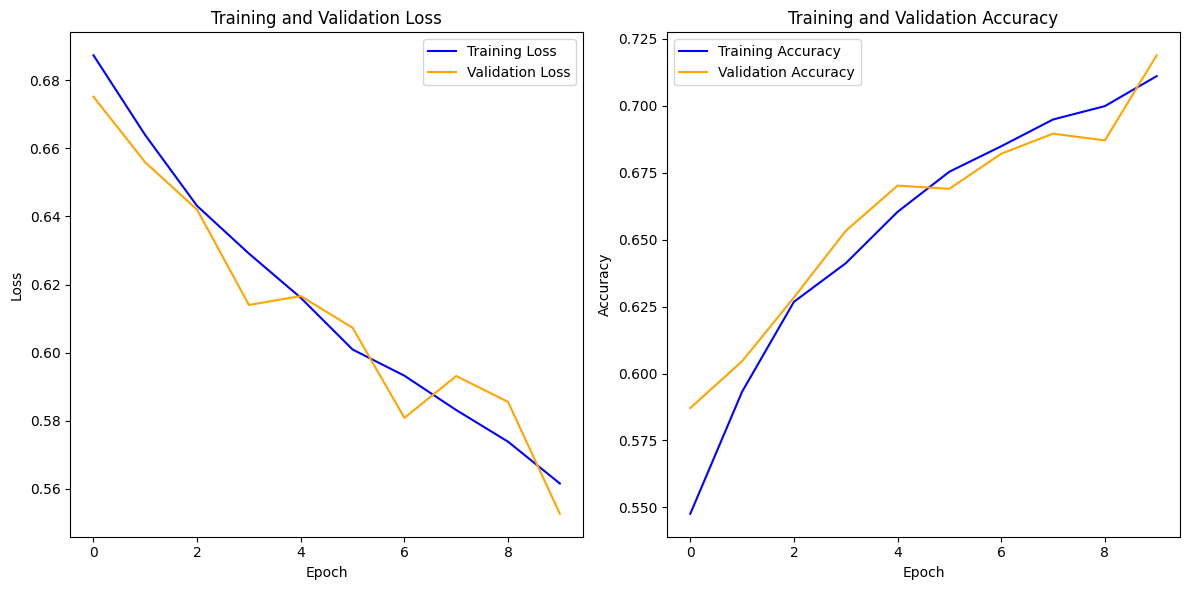

In [55]:
train_losses = [0.6874, 0.6639, 0.6431, 0.6291, 0.6161, 0.6009, 0.5932, 0.5831, 0.5738, 0.5615]
train_accuracies = [0.5476, 0.5932, 0.6268, 0.6412, 0.6604, 0.6754, 0.6849, 0.6949, 0.6999, 0.7111]
val_losses = [0.6752, 0.6559, 0.6420, 0.6140, 0.6166, 0.6073, 0.5808, 0.5931, 0.5855, 0.5526]
val_accuracies = [0.5871, 0.6046, 0.6284, 0.6533, 0.6702, 0.6690, 0.6821, 0.6896, 0.6871, 0.7189]
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
#5 cnn 3 fcc
import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)  # New convolutional layer
        self.relu5 = nn.LeakyReLU() 
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 7 * 7, 512)
        self.relu6 = nn.LeakyReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu7 = nn.LeakyReLU()
        self.fc3 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.pool4(self.relu5(self.conv5(x)))  # Using pool4 after the newly added conv5
        x = self.flatten(x)
        x = self.relu6(self.fc1(x))
        x = self.relu7(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(),weight_decay=0.001, lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6935, Train Acc: 0.4916, Val Loss: 0.6932, Val Acc: 0.4847
Epoch 2/10, Train Loss: 0.6933, Train Acc: 0.4978, Val Loss: 0.6931, Val Acc: 0.5153
Epoch 3/10, Train Loss: 0.6932, Train Acc: 0.4953, Val Loss: 0.6931, Val Acc: 0.5153
Epoch 4/10, Train Loss: 0.6932, Train Acc: 0.4963, Val Loss: 0.6931, Val Acc: 0.5153
Epoch 5/10, Train Loss: 0.6932, Train Acc: 0.4956, Val Loss: 0.6931, Val Acc: 0.5153
Epoch 6/10, Train Loss: 0.6932, Train Acc: 0.4853, Val Loss: 0.6931, Val Acc: 0.5153
Epoch 7/10, Train Loss: 0.6932, Train Acc: 0.4925, Val Loss: 0.6931, Val Acc: 0.5153
Epoch 8/10, Train Loss: 0.6932, Train Acc: 0.5016, Val Loss: 0.6931, Val Acc: 0.5153
Epoch 9/10, Train Loss: 0.6932, Train Acc: 0.4922, Val Loss: 0.6931, Val Acc: 0.5153
Epoch 10/10, Train Loss: 0.6932, Train Acc: 0.4938, Val Loss: 0.6931, Val Acc: 0.5153
Final Test Loss: 0.6931, Final Test Acc: 0.5002


In [31]:
#5 layers weight decay - 0.001

import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)  
        self.relu5 = nn.LeakyReLU() 
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 7 * 7, 256)
        self.bn6 = nn.BatchNorm1d(256)  
        self.relu6 = nn.LeakyReLU()
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.pool5(self.relu5(self.bn5(self.conv5(x))))
        x = self.flatten(x)
        x = self.relu6(self.bn6(self.fc1(x)))
        x = self.fc2(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6271, Train Acc: 0.6535, Val Loss: 0.6686, Val Acc: 0.6134
Epoch 2/10, Train Loss: 0.5665, Train Acc: 0.7082, Val Loss: 0.6235, Val Acc: 0.6752
Epoch 3/10, Train Loss: 0.5385, Train Acc: 0.7278, Val Loss: 0.5626, Val Acc: 0.7114
Epoch 4/10, Train Loss: 0.5130, Train Acc: 0.7416, Val Loss: 0.6831, Val Acc: 0.6571
Epoch 5/10, Train Loss: 0.4931, Train Acc: 0.7591, Val Loss: 0.5922, Val Acc: 0.6921
Epoch 6/10, Train Loss: 0.4819, Train Acc: 0.7675, Val Loss: 0.5848, Val Acc: 0.7002
Epoch 7/10, Train Loss: 0.4723, Train Acc: 0.7750, Val Loss: 0.5743, Val Acc: 0.7021
Epoch 8/10, Train Loss: 0.4628, Train Acc: 0.7794, Val Loss: 0.6628, Val Acc: 0.7058
Epoch 9/10, Train Loss: 0.4592, Train Acc: 0.7867, Val Loss: 0.6813, Val Acc: 0.6446
Epoch 10/10, Train Loss: 0.4394, Train Acc: 0.7956, Val Loss: 0.4683, Val Acc: 0.7639
Final Test Loss: 0.4178, Final Test Acc: 0.8127


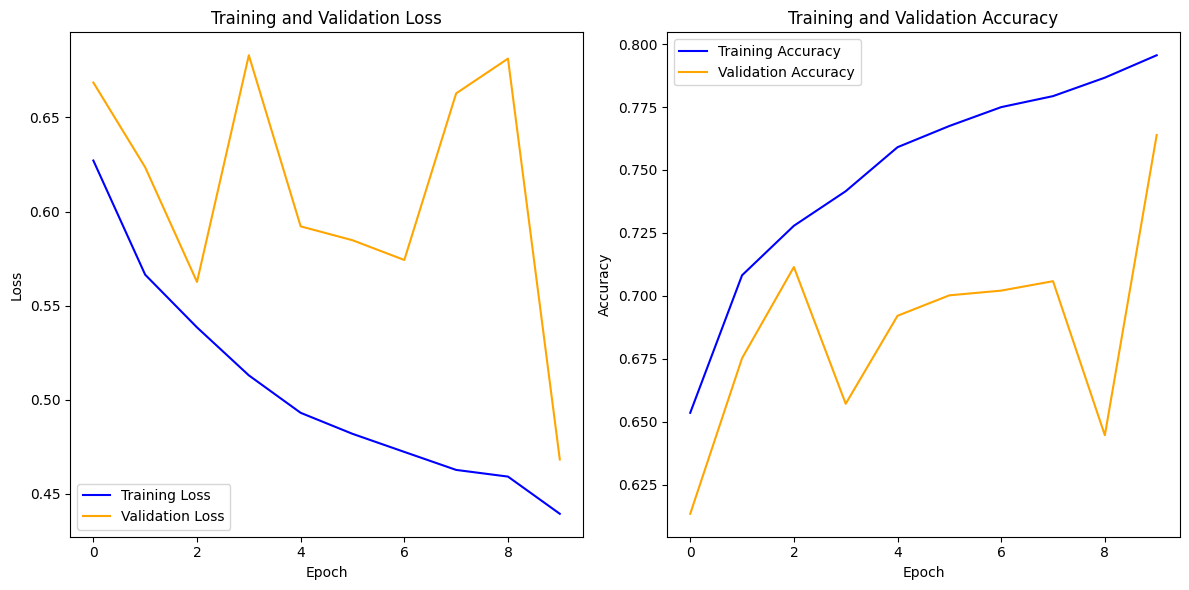

In [32]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

# Define transformations for training and validation sets
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(10),       
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32

# Load the entire dataset
full_dataset = ImageFolder('/kaggle/input/cat-and-dog/training_set/training_set')
test_dataset = ImageFolder('/kaggle/input/cat-and-dog/test_set/test_set',val_transform)

# Calculate the size of training and validation sets
total_train = len(full_dataset)
train_size = int(0.8 * total_train)
val_size = total_train - train_size

# Split the dataset into training and validation sets
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# Apply transformations to training and validation datasets
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

# Create data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset,batch_size =batch_size,shuffle=False)


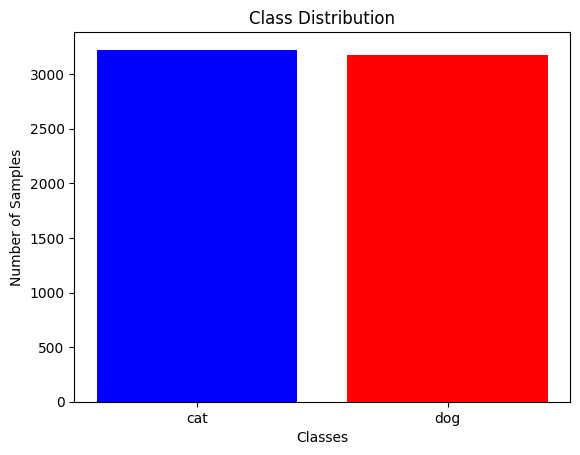

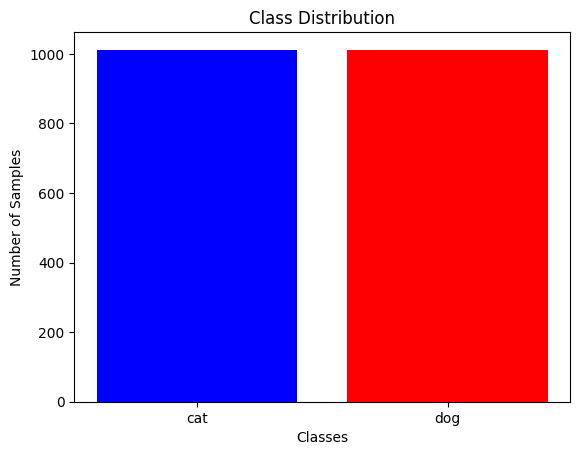

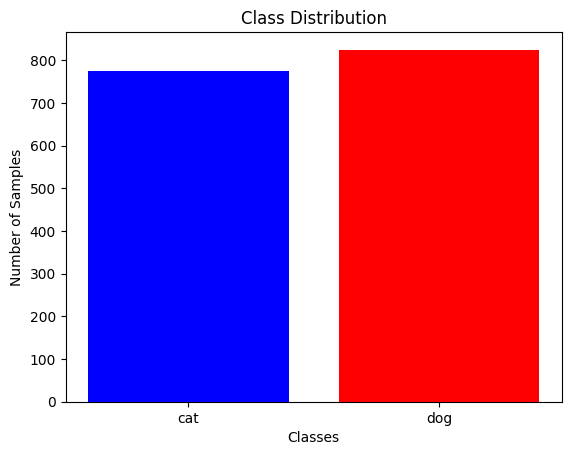

In [3]:
import matplotlib.pyplot as plt
classes = ['cat','dog']
def plot_class_distribution(dataset, classes):
    class_counts = {class_name: 0 for class_name in classes}
    
    # Count the number of samples for each class in the entire dataset
    for _, label in dataset:
        class_counts[classes[label]] += 1
    
    # Sort classes alphabetically for consistent plotting
    sorted_classes = sorted(classes)
    colors = ['blue','red']
    # Plot the bar chart
    plt.bar(sorted_classes, [class_counts[class_name] for class_name in sorted_classes], color=colors)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()

# Example usage:
# Assuming 'train_dataset' is your training dataset and 'classes' is a list containing the class names
plot_class_distribution(train_dataset, classes)
plot_class_distribution(test_dataset, classes)
plot_class_distribution(val_dataset, classes)


In [47]:
import torch
import torch.nn as nn  
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)  
        self.relu5 = nn.LeakyReLU() 
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 7 * 7, 256)
        self.bn6 = nn.BatchNorm1d(256)  
        self.relu6 = nn.LeakyReLU()
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.pool5(self.relu5(self.bn5(self.conv5(x))))
        x = self.flatten(x)
        x = self.relu6(self.bn6(self.fc1(x)))
        x = self.fc2(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.5516, Train Acc: 0.7196, Val Loss: 0.7693, Val Acc: 0.6427
Epoch 2/10, Train Loss: 0.3955, Train Acc: 0.8189, Val Loss: 0.3987, Val Acc: 0.8164
Epoch 3/10, Train Loss: 0.3007, Train Acc: 0.8754, Val Loss: 0.4820, Val Acc: 0.7726
Epoch 4/10, Train Loss: 0.2175, Train Acc: 0.9227, Val Loss: 0.5555, Val Acc: 0.7570
Epoch 5/10, Train Loss: 0.1411, Train Acc: 0.9677, Val Loss: 0.3809, Val Acc: 0.8257
Epoch 6/10, Train Loss: 0.0943, Train Acc: 0.9856, Val Loss: 0.9312, Val Acc: 0.6914
Epoch 7/10, Train Loss: 0.0752, Train Acc: 0.9922, Val Loss: 0.4172, Val Acc: 0.8182
Epoch 8/10, Train Loss: 0.0409, Train Acc: 0.9991, Val Loss: 0.5344, Val Acc: 0.7858
Epoch 9/10, Train Loss: 0.0337, Train Acc: 0.9995, Val Loss: 0.4014, Val Acc: 0.8145
Epoch 10/10, Train Loss: 0.0243, Train Acc: 1.0000, Val Loss: 0.3783, Val Acc: 0.8357
Final Test Loss: 0.3845, Final Test Acc: 0.8507


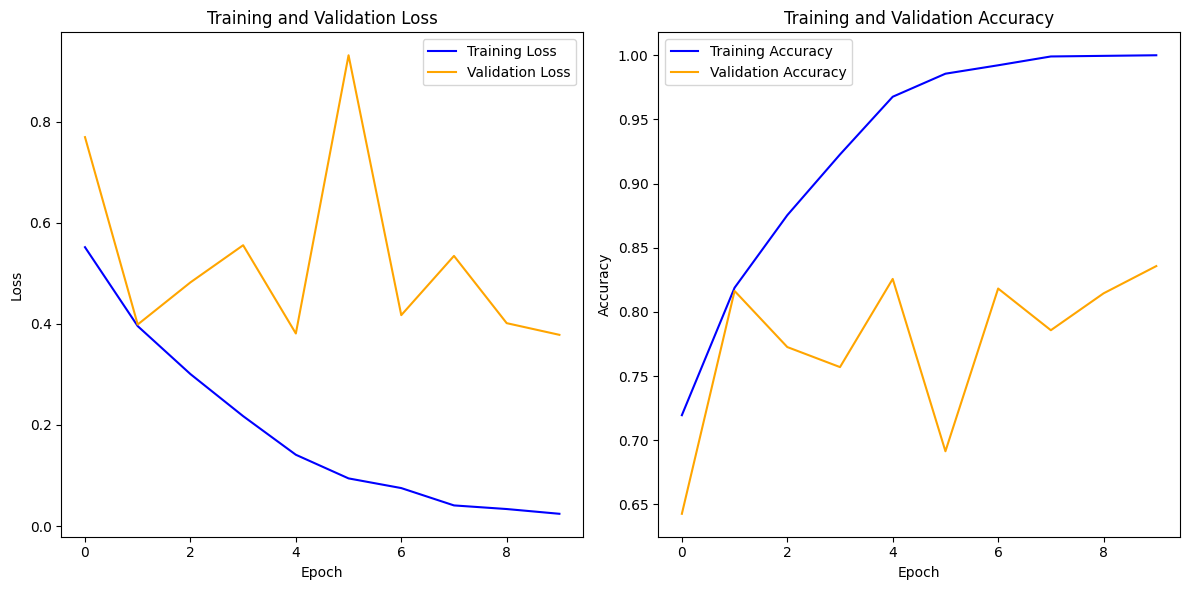

In [48]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
#drop-out

import torch
import torch.nn as nn  

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)  
        self.relu5 = nn.LeakyReLU() 
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 7 * 7, 256)
        self.bn6 = nn.BatchNorm1d(256)  
        self.relu6 = nn.LeakyReLU()
        
        # Adding dropout layer after fully connected layer
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.pool5(self.relu5(self.bn5(self.conv5(x))))
        x = self.flatten(x)
        x = self.relu6(self.bn6(self.fc1(x)))
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.5511, Train Acc: 0.7191, Val Loss: 0.6715, Val Acc: 0.6846
Epoch 2/10, Train Loss: 0.4055, Train Acc: 0.8150, Val Loss: 0.9704, Val Acc: 0.6259
Epoch 3/10, Train Loss: 0.3287, Train Acc: 0.8568, Val Loss: 0.4252, Val Acc: 0.8026
Epoch 4/10, Train Loss: 0.2527, Train Acc: 0.9055, Val Loss: 0.5349, Val Acc: 0.7583
Epoch 5/10, Train Loss: 0.1984, Train Acc: 0.9391, Val Loss: 0.5697, Val Acc: 0.7502
Epoch 6/10, Train Loss: 0.1407, Train Acc: 0.9655, Val Loss: 0.4515, Val Acc: 0.8076
Epoch 7/10, Train Loss: 0.0979, Train Acc: 0.9861, Val Loss: 0.4403, Val Acc: 0.8139
Epoch 8/10, Train Loss: 0.0752, Train Acc: 0.9927, Val Loss: 0.7824, Val Acc: 0.7114
Epoch 9/10, Train Loss: 0.0657, Train Acc: 0.9928, Val Loss: 0.3835, Val Acc: 0.8289
Epoch 10/10, Train Loss: 0.0430, Train Acc: 0.9991, Val Loss: 0.3936, Val Acc: 0.8420
Final Test Loss: 0.3759, Final Test Acc: 0.8473


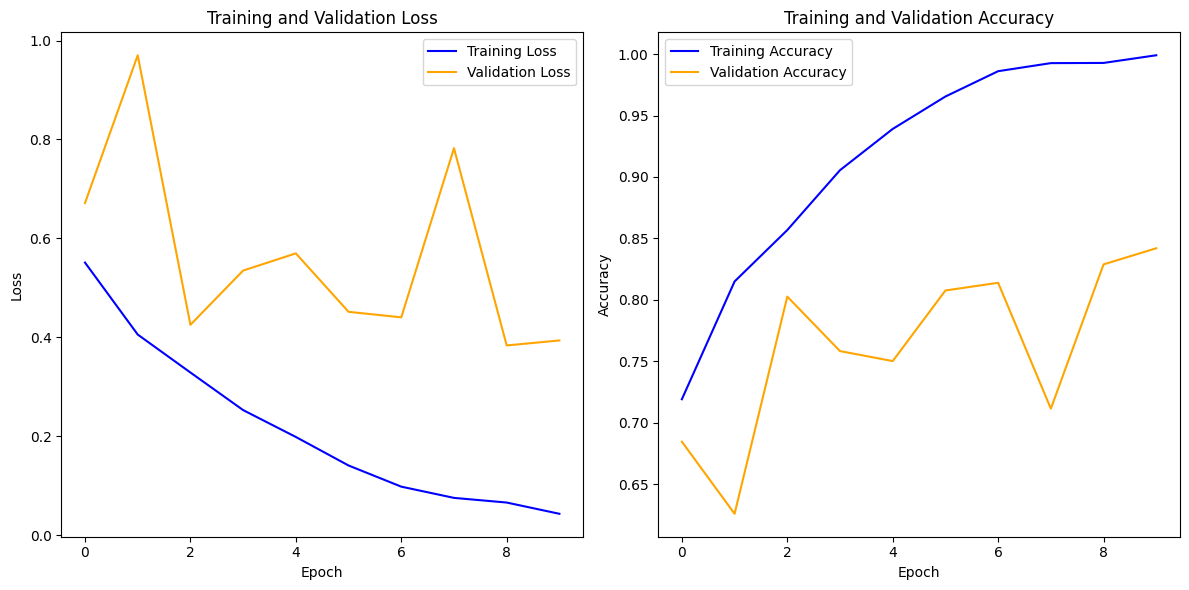

In [50]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
#reduced 1 layer1
import torch
import torch.nn as nn  

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 14 * 14, 256)
        self.bn5 = nn.BatchNorm1d(256)  
        self.relu5 = nn.LeakyReLU()
        
        # Adding dropout layer after fully connected layer
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.flatten(x)
        x = self.relu5(self.bn5(self.fc1(x)))
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.5662, Train Acc: 0.7002, Val Loss: 0.5773, Val Acc: 0.7239
Epoch 2/10, Train Loss: 0.4255, Train Acc: 0.8039, Val Loss: 0.4471, Val Acc: 0.7876
Epoch 3/10, Train Loss: 0.3537, Train Acc: 0.8507, Val Loss: 0.9597, Val Acc: 0.6640
Epoch 4/10, Train Loss: 0.3046, Train Acc: 0.8768, Val Loss: 0.4332, Val Acc: 0.7945
Epoch 5/10, Train Loss: 0.2429, Train Acc: 0.9088, Val Loss: 0.4653, Val Acc: 0.7839
Epoch 6/10, Train Loss: 0.1997, Train Acc: 0.9363, Val Loss: 1.0032, Val Acc: 0.5928
Epoch 7/10, Train Loss: 0.1618, Train Acc: 0.9606, Val Loss: 0.3937, Val Acc: 0.8214
Epoch 8/10, Train Loss: 0.1235, Train Acc: 0.9786, Val Loss: 0.3970, Val Acc: 0.8157
Epoch 9/10, Train Loss: 0.0933, Train Acc: 0.9894, Val Loss: 1.6813, Val Acc: 0.5821
Epoch 10/10, Train Loss: 0.0803, Train Acc: 0.9930, Val Loss: 0.3918, Val Acc: 0.8264
Final Test Loss: 0.3994, Final Test Acc: 0.8309


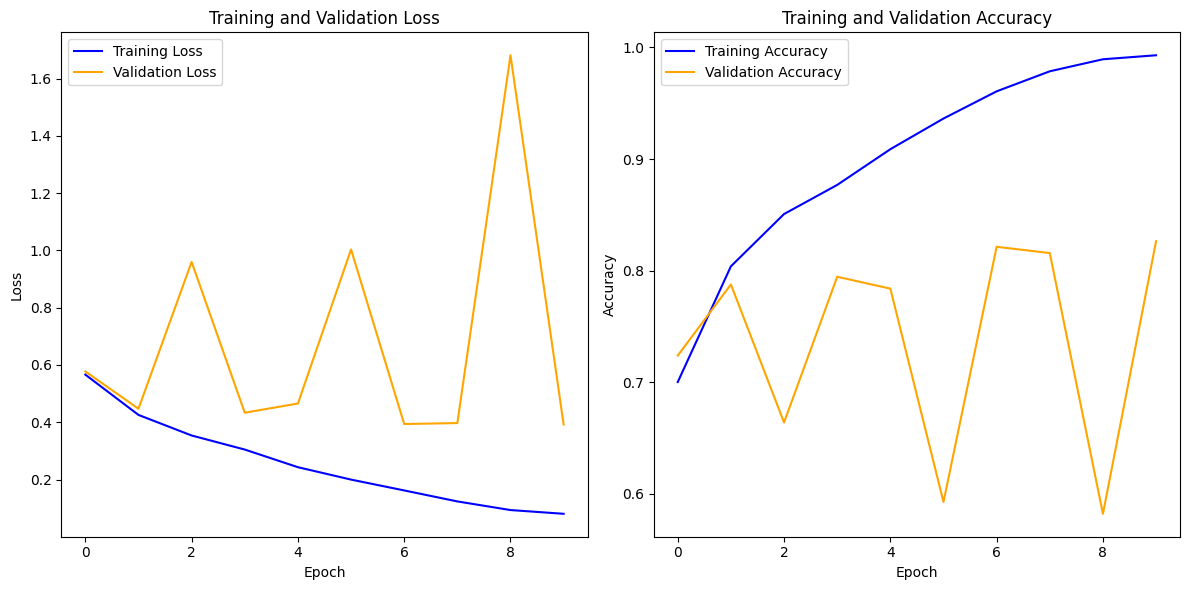

In [52]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
#reduced another 1 layer
import torch
import torch.nn as nn  

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 28 * 28, 256)  
        self.bn4 = nn.BatchNorm1d(256)  
        self.relu4 = nn.LeakyReLU()
        
        # Adding dropout layer after fully connected layer
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.flatten(x)
        x = self.relu4(self.bn4(self.fc1(x)))  # Adjusted the input size based on the removed layer
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.5856, Train Acc: 0.6908, Val Loss: 0.5294, Val Acc: 0.7352
Epoch 2/10, Train Loss: 0.4553, Train Acc: 0.7903, Val Loss: 0.6516, Val Acc: 0.6896
Epoch 3/10, Train Loss: 0.3608, Train Acc: 0.8471, Val Loss: 0.4995, Val Acc: 0.7589
Epoch 4/10, Train Loss: 0.2745, Train Acc: 0.9010, Val Loss: 0.4788, Val Acc: 0.7745
Epoch 5/10, Train Loss: 0.2079, Train Acc: 0.9389, Val Loss: 0.5263, Val Acc: 0.7583
Epoch 6/10, Train Loss: 0.1576, Train Acc: 0.9649, Val Loss: 0.4456, Val Acc: 0.8020
Epoch 7/10, Train Loss: 0.1127, Train Acc: 0.9856, Val Loss: 0.4861, Val Acc: 0.7939
Epoch 8/10, Train Loss: 0.0915, Train Acc: 0.9931, Val Loss: 1.0063, Val Acc: 0.6408
Epoch 9/10, Train Loss: 0.0776, Train Acc: 0.9939, Val Loss: 0.4677, Val Acc: 0.7914
Epoch 10/10, Train Loss: 0.0567, Train Acc: 0.9991, Val Loss: 0.5107, Val Acc: 0.7789
Final Test Loss: 0.5300, Final Test Acc: 0.7800


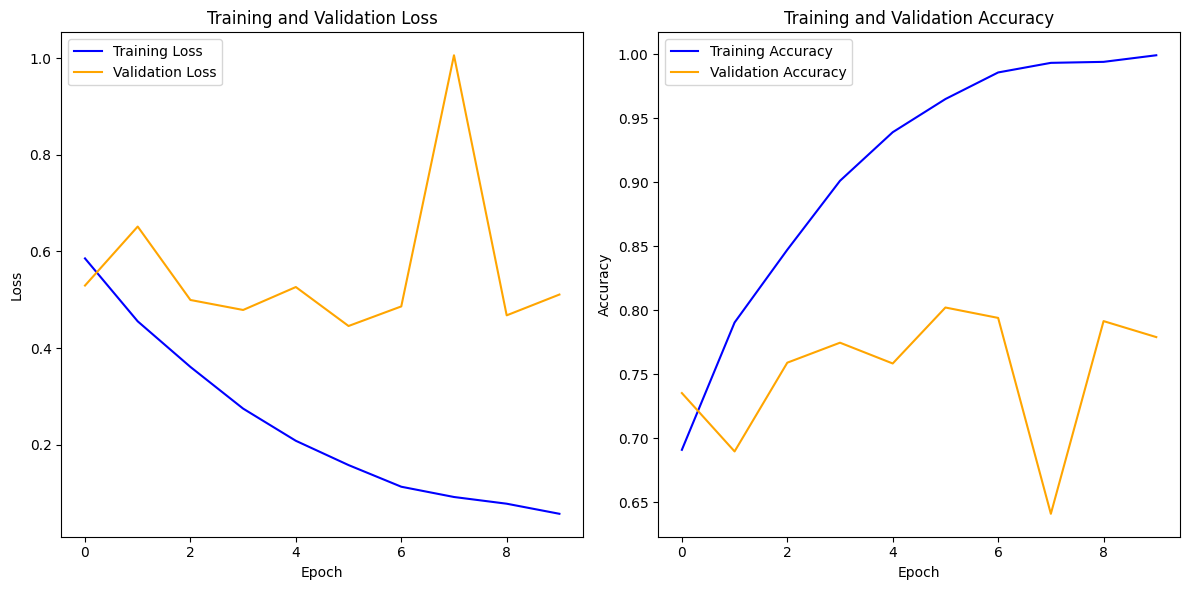

In [54]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
import torch
import torch.nn as nn  

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 14 * 14, 256)
        self.bn5 = nn.BatchNorm1d(256)  
        self.relu5 = nn.LeakyReLU()
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.flatten(x)
        x = self.relu5(self.bn5(self.fc1(x)))
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.00001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6190, Train Acc: 0.6591, Val Loss: 0.5560, Val Acc: 0.7158
Epoch 2/10, Train Loss: 0.5525, Train Acc: 0.7199, Val Loss: 0.5389, Val Acc: 0.7270
Epoch 3/10, Train Loss: 0.5157, Train Acc: 0.7562, Val Loss: 0.5287, Val Acc: 0.7395
Epoch 4/10, Train Loss: 0.5049, Train Acc: 0.7648, Val Loss: 0.5181, Val Acc: 0.7502
Epoch 5/10, Train Loss: 0.4924, Train Acc: 0.7811, Val Loss: 0.5200, Val Acc: 0.7420
Epoch 6/10, Train Loss: 0.4806, Train Acc: 0.7829, Val Loss: 0.5067, Val Acc: 0.7558
Epoch 7/10, Train Loss: 0.4693, Train Acc: 0.7887, Val Loss: 0.5035, Val Acc: 0.7564
Epoch 8/10, Train Loss: 0.4617, Train Acc: 0.8023, Val Loss: 0.5063, Val Acc: 0.7545
Epoch 9/10, Train Loss: 0.4538, Train Acc: 0.8062, Val Loss: 0.5012, Val Acc: 0.7583
Epoch 10/10, Train Loss: 0.4452, Train Acc: 0.8153, Val Loss: 0.4925, Val Acc: 0.7670
Final Test Loss: 0.5163, Final Test Acc: 0.7533


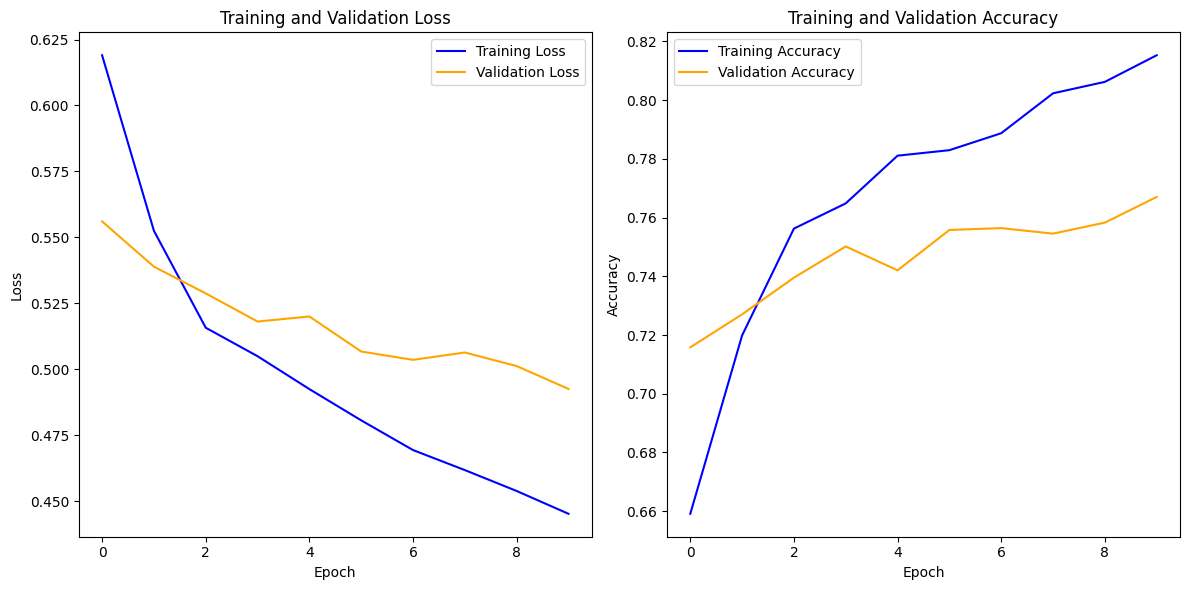

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
#reduced 1 layer1
import torch
import torch.nn as nn  

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 14 * 14, 256)
        self.bn5 = nn.BatchNorm1d(256)  
        self.relu5 = nn.LeakyReLU()
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.flatten(x)
        x = self.relu5(self.bn5(self.fc1(x)))
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.000001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.7147, Train Acc: 0.5417, Val Loss: 0.6867, Val Acc: 0.5572
Epoch 2/10, Train Loss: 0.6926, Train Acc: 0.5767, Val Loss: 0.6798, Val Acc: 0.5771
Epoch 3/10, Train Loss: 0.6847, Train Acc: 0.5829, Val Loss: 0.6729, Val Acc: 0.5853
Epoch 4/10, Train Loss: 0.6770, Train Acc: 0.5959, Val Loss: 0.6613, Val Acc: 0.5971
Epoch 5/10, Train Loss: 0.6632, Train Acc: 0.6074, Val Loss: 0.6591, Val Acc: 0.6027
Epoch 6/10, Train Loss: 0.6652, Train Acc: 0.6052, Val Loss: 0.6583, Val Acc: 0.6002
Epoch 7/10, Train Loss: 0.6667, Train Acc: 0.6092, Val Loss: 0.6498, Val Acc: 0.6159
Epoch 8/10, Train Loss: 0.6548, Train Acc: 0.6135, Val Loss: 0.6470, Val Acc: 0.6209
Epoch 9/10, Train Loss: 0.6519, Train Acc: 0.6213, Val Loss: 0.6449, Val Acc: 0.6271
Epoch 10/10, Train Loss: 0.6475, Train Acc: 0.6280, Val Loss: 0.6469, Val Acc: 0.6234
Final Test Loss: 0.6474, Final Test Acc: 0.6233


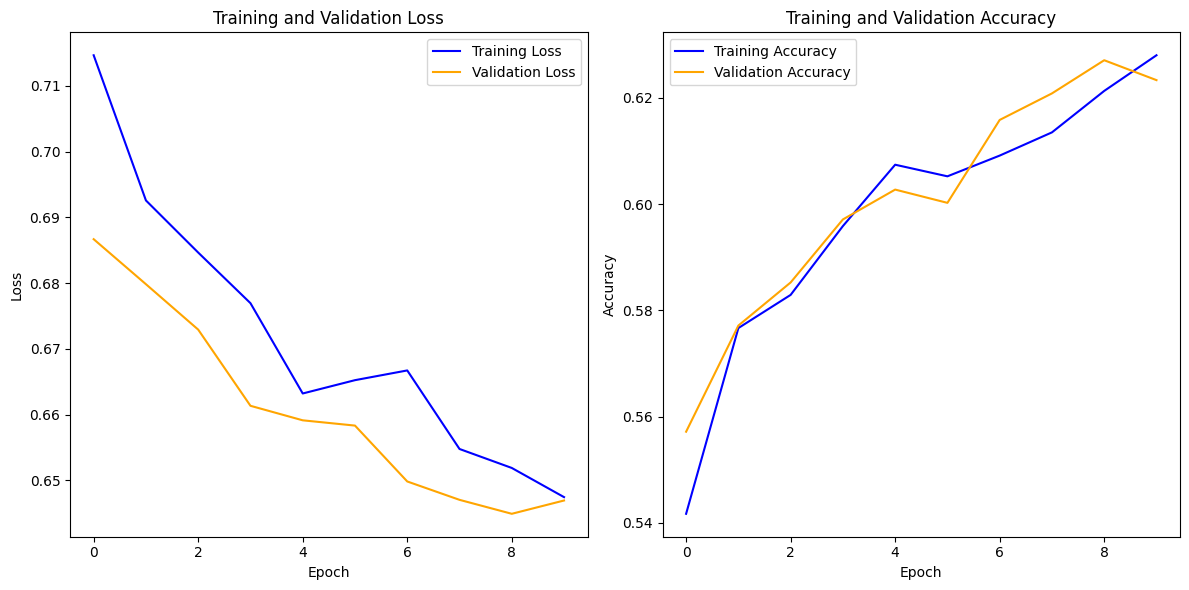

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
#30 epoch
import torch
import torch.nn as nn  
import torch.optim as optim
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 14 * 14, 256)
        self.bn5 = nn.BatchNorm1d(256)  
        self.relu5 = nn.LeakyReLU()
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.flatten(x)
        x = self.relu5(self.bn5(self.fc1(x)))
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.000001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/30, Train Loss: 0.6892, Train Acc: 0.5656, Val Loss: 0.6466, Val Acc: 0.6227
Epoch 2/30, Train Loss: 0.6661, Train Acc: 0.6018, Val Loss: 0.6353, Val Acc: 0.6352
Epoch 3/30, Train Loss: 0.6588, Train Acc: 0.6071, Val Loss: 0.6277, Val Acc: 0.6433
Epoch 4/30, Train Loss: 0.6491, Train Acc: 0.6190, Val Loss: 0.6227, Val Acc: 0.6490
Epoch 5/30, Train Loss: 0.6491, Train Acc: 0.6205, Val Loss: 0.6179, Val Acc: 0.6515
Epoch 6/30, Train Loss: 0.6395, Train Acc: 0.6295, Val Loss: 0.6130, Val Acc: 0.6571
Epoch 7/30, Train Loss: 0.6316, Train Acc: 0.6394, Val Loss: 0.6104, Val Acc: 0.6571
Epoch 8/30, Train Loss: 0.6295, Train Acc: 0.6479, Val Loss: 0.6069, Val Acc: 0.6627
Epoch 9/30, Train Loss: 0.6235, Train Acc: 0.6452, Val Loss: 0.6051, Val Acc: 0.6633
Epoch 10/30, Train Loss: 0.6258, Train Acc: 0.6522, Val Loss: 0.6025, Val Acc: 0.6708
Epoch 11/30, Train Loss: 0.6235, Train Acc: 0.6466, Val Loss: 0.6021, Val Acc: 0.6683
Epoch 12/30, Train Loss: 0.6199, Train Acc: 0.6601, Val Loss: 0

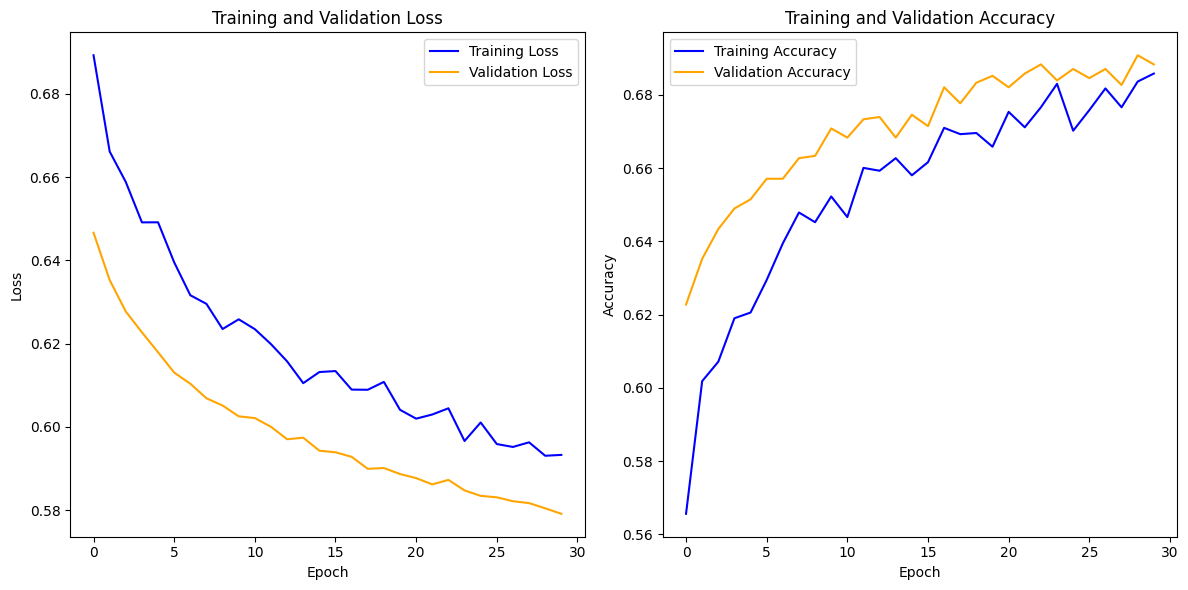

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn  
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(0.2)
        
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout4 = nn.Dropout(0.2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 14 * 14, 256)
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.dropout1(x)
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.dropout2(x)
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.dropout3(x)
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.dropout4(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.000001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/30, Train Loss: 0.6810, Train Acc: 0.5629, Val Loss: 0.6877, Val Acc: 0.5247
Epoch 2/30, Train Loss: 0.6674, Train Acc: 0.5910, Val Loss: 0.6820, Val Acc: 0.5353
Epoch 3/30, Train Loss: 0.6646, Train Acc: 0.6013, Val Loss: 0.6769, Val Acc: 0.5434
Epoch 4/30, Train Loss: 0.6594, Train Acc: 0.6060, Val Loss: 0.6773, Val Acc: 0.5434
Epoch 5/30, Train Loss: 0.6538, Train Acc: 0.6177, Val Loss: 0.6786, Val Acc: 0.5415
Epoch 6/30, Train Loss: 0.6480, Train Acc: 0.6212, Val Loss: 0.6695, Val Acc: 0.5603
Epoch 7/30, Train Loss: 0.6508, Train Acc: 0.6191, Val Loss: 0.6733, Val Acc: 0.5528
Epoch 8/30, Train Loss: 0.6455, Train Acc: 0.6268, Val Loss: 0.6722, Val Acc: 0.5528
Epoch 9/30, Train Loss: 0.6461, Train Acc: 0.6274, Val Loss: 0.6726, Val Acc: 0.5534
Epoch 10/30, Train Loss: 0.6423, Train Acc: 0.6266, Val Loss: 0.6734, Val Acc: 0.5509
Epoch 11/30, Train Loss: 0.6424, Train Acc: 0.6291, Val Loss: 0.6707, Val Acc: 0.5553
Epoch 12/30, Train Loss: 0.6421, Train Acc: 0.6352, Val Loss: 0

In [4]:
#30 epoch
import torch
import torch.nn as nn  
import torch.optim as optim
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 14 * 14, 256)
        self.bn5 = nn.BatchNorm1d(256) 
        
        self.dropout = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.flatten(x)
        x = self.bn5(self.fc1(x))
        
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.00001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/30, Train Loss: 0.5979, Train Acc: 0.6810, Val Loss: 0.5520, Val Acc: 0.7152
Epoch 2/30, Train Loss: 0.5014, Train Acc: 0.7569, Val Loss: 0.5187, Val Acc: 0.7364
Epoch 3/30, Train Loss: 0.4706, Train Acc: 0.7797, Val Loss: 0.5161, Val Acc: 0.7427
Epoch 4/30, Train Loss: 0.4524, Train Acc: 0.7904, Val Loss: 0.5381, Val Acc: 0.7283
Epoch 5/30, Train Loss: 0.4371, Train Acc: 0.7997, Val Loss: 0.4993, Val Acc: 0.7552
Epoch 6/30, Train Loss: 0.4225, Train Acc: 0.8107, Val Loss: 0.4953, Val Acc: 0.7601
Epoch 7/30, Train Loss: 0.4120, Train Acc: 0.8215, Val Loss: 0.4945, Val Acc: 0.7614
Epoch 8/30, Train Loss: 0.4000, Train Acc: 0.8270, Val Loss: 0.4967, Val Acc: 0.7570
Epoch 9/30, Train Loss: 0.3884, Train Acc: 0.8315, Val Loss: 0.4921, Val Acc: 0.7658
Epoch 10/30, Train Loss: 0.3770, Train Acc: 0.8446, Val Loss: 0.4893, Val Acc: 0.7658
Epoch 11/30, Train Loss: 0.3760, Train Acc: 0.8438, Val Loss: 0.4860, Val Acc: 0.7645
Epoch 12/30, Train Loss: 0.3698, Train Acc: 0.8463, Val Loss: 0

In [14]:

import torch
import torch.nn as nn  

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)  
        self.relu4 = nn.LeakyReLU() 
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 14 * 14, 256)
        self.bn5 = nn.BatchNorm1d(256)  
        self.relu5 = nn.LeakyReLU()
        
        
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.pool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.flatten(x)
        x = self.relu5(self.bn5(self.fc1(x)))
        
        
        x = self.fc2(x)
        return x
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.0001, lr=0.00001)
criterion = nn.BCEWithLogitsLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.5893, Train Acc: 0.6872, Val Loss: 0.5478, Val Acc: 0.7214
Epoch 2/10, Train Loss: 0.5088, Train Acc: 0.7661, Val Loss: 0.5255, Val Acc: 0.7364
Epoch 3/10, Train Loss: 0.4765, Train Acc: 0.7915, Val Loss: 0.5164, Val Acc: 0.7477
Epoch 4/10, Train Loss: 0.4577, Train Acc: 0.8097, Val Loss: 0.5089, Val Acc: 0.7545
Epoch 5/10, Train Loss: 0.4432, Train Acc: 0.8195, Val Loss: 0.5050, Val Acc: 0.7527
Epoch 6/10, Train Loss: 0.4281, Train Acc: 0.8370, Val Loss: 0.5003, Val Acc: 0.7570
Epoch 7/10, Train Loss: 0.4135, Train Acc: 0.8431, Val Loss: 0.5012, Val Acc: 0.7558
Epoch 8/10, Train Loss: 0.4093, Train Acc: 0.8473, Val Loss: 0.4941, Val Acc: 0.7620
Epoch 9/10, Train Loss: 0.4013, Train Acc: 0.8563, Val Loss: 0.4865, Val Acc: 0.7651
Epoch 10/10, Train Loss: 0.3915, Train Acc: 0.8618, Val Loss: 0.5028, Val Acc: 0.7452
Final Test Loss: 0.5341, Final Test Acc: 0.7360


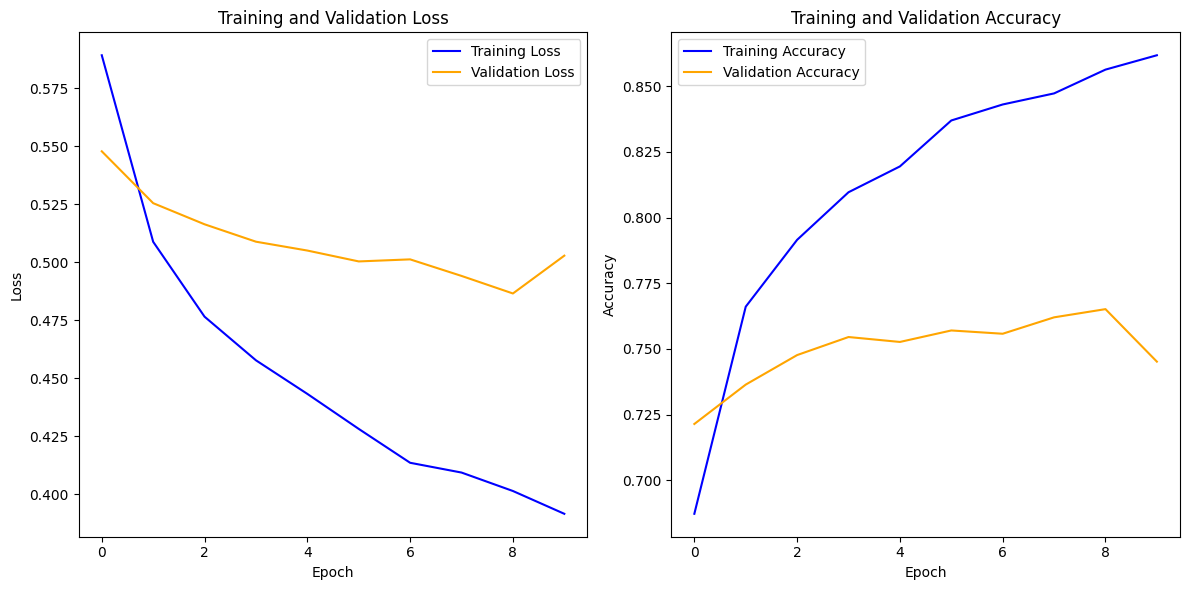

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn  
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)  
        self.relu1 = nn.LeakyReLU()  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)  
        self.relu2 = nn.LeakyReLU()  
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)  
        self.relu3 = nn.LeakyReLU()  
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 28 * 28, 256)  
        self.bn4 = nn.BatchNorm1d(256)  
        self.relu4 = nn.LeakyReLU()
        
        # Adding dropout layer after fully connected layer
        self.dropout = nn.Dropout(0.2)
        
        # Change the last layer to use nn.Sequential with Softmax
        self.output_layer = nn.Sequential(
            nn.Linear(256, 1),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.flatten(x)
        x = self.relu4(self.bn4(self.fc1(x)))  # Adjusted the input size based on the removed layer
        
        x = self.dropout(x)
        
        x = self.output_layer(x)  # Pass through the output layer with softmax activation
        return x

model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), weight_decay=0.001, lr=0.001)
criterion = nn.CrossEntropyLoss() 

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

YAML file usage

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import yaml

# Load the YAML file
try:
    with open('/kaggle/input/conf-file/config.yaml', 'r') as file:
        config = yaml.safe_load(file)
except FileNotFoundError:
    print("Config YAML file not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"Error loading YAML file: {e}")
    exit()

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self, config):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        if 'batch_normalization' in config and config['batch_normalization']:
            self.batch_norm = nn.BatchNorm2d(32)
        self.relu1 = getattr(nn, config['activation'])()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        if 'batch_normalization' in config and config['batch_normalization']:
            self.batch_norm = nn.BatchNorm2d(64)
        self.relu2 = getattr(nn, config['activation'])()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        if 'batch_normalization' in config and config['batch_normalization']:
            self.batch_norm = nn.BatchNorm2d(128)
        self.relu3 = getattr(nn, config['activation'])()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        if 'batch_normalization' in config and config['batch_normalization']:
            self.batch_norm = nn.BatchNorm2d(256)
        self.relu4 = getattr(nn, config['activation'])()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 128)
#         self.relu5 = getattr(nn, config['activation'])()
        self.fc2 = nn.Linear(128, 1)
#         self.sigmoid = nn.Sigmoid()

        if 'dropout' in config:
            self.dropout = nn.Dropout(config['dropout'])
#         if 'batch_normalization' in config and config['batch_normalization']:
#             self.batch_norm = nn.BatchNorm2d(512)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        if hasattr(self, 'dropout'):
            x = self.dropout(x)
        if hasattr(self, 'batch_norm'):
            x = self.batch_norm(x)
        x = self.fc2(x)
        x = self.sigmoid(x)  
        return x

try:
    selected_model_config = config['models']['model_4']
except KeyError:
    print("Specified model configuration not found in the YAML file. Please check the YAML file.")
    exit()

# Create the model
model = SimpleCNN(selected_model_config).to(device)

# Define the optimizer based on YAML configuration
optimizer = getattr(optim, selected_model_config['optimizer']['algorithm'])(
    model.parameters(), 
    lr=selected_model_config['learning_rate'],
    weight_decay=selected_model_config['optimizer'].get('weight_decay', 0)  
)

criterion = getattr(nn, selected_model_config['loss_function'])()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6715, Train Acc: 0.5031, Val Loss: 0.6633, Val Acc: 0.4891
Epoch 2/10, Train Loss: 0.6352, Train Acc: 0.5036, Val Loss: 0.6306, Val Acc: 0.4953
Epoch 3/10, Train Loss: 0.6192, Train Acc: 0.5041, Val Loss: 0.6286, Val Acc: 0.4897
Epoch 4/10, Train Loss: 0.6081, Train Acc: 0.5036, Val Loss: 0.7191, Val Acc: 0.4891
Epoch 5/10, Train Loss: 0.6007, Train Acc: 0.5031, Val Loss: 0.6194, Val Acc: 0.4903
Epoch 6/10, Train Loss: 0.5874, Train Acc: 0.5036, Val Loss: 0.6124, Val Acc: 0.4897
Epoch 7/10, Train Loss: 0.5783, Train Acc: 0.5033, Val Loss: 0.6149, Val Acc: 0.4891
Epoch 8/10, Train Loss: 0.5678, Train Acc: 0.5031, Val Loss: 0.6155, Val Acc: 0.4891
Epoch 9/10, Train Loss: 0.5594, Train Acc: 0.5033, Val Loss: 0.6124, Val Acc: 0.4897
Epoch 10/10, Train Loss: 0.5499, Train Acc: 0.5031, Val Loss: 0.6206, Val Acc: 0.4928
Final Test Loss: 0.6212, Final Test Acc: 0.5032


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import yaml

# Load the YAML file
try:
    with open('/kaggle/input/conf-file/config.yaml', 'r') as file:
        config = yaml.safe_load(file)
except FileNotFoundError:
    print("Config YAML file not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"Error loading YAML file: {e}")
    exit()

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self, config):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        if 'batch_normalization' in config and config['batch_normalization']:
            self.batch_norm1 = nn.BatchNorm2d(32)
        self.relu1 = getattr(nn, config['activation'])()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        if 'batch_normalization' in config and config['batch_normalization']:
            self.batch_norm2 = nn.BatchNorm2d(64)
        self.relu2 = getattr(nn, config['activation'])()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        if 'batch_normalization' in config and config['batch_normalization']:
            self.batch_norm3 = nn.BatchNorm2d(128)
        self.relu3 = getattr(nn, config['activation'])()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        if 'batch_normalization' in config and config['batch_normalization']:
            self.batch_norm4 = nn.BatchNorm2d(256)
        self.relu4 = getattr(nn, config['activation'])()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 128)
        self.relu5 = getattr(nn, config['activation'])()
        self.fc2 = nn.Linear(128, 1)

        if 'dropout' in config:
            self.dropout = nn.Dropout(config['dropout'])

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        if hasattr(self, 'batch_norm1'):
            x = self.batch_norm1(x)
        x = self.pool2(self.relu2(self.conv2(x)))
        if hasattr(self, 'batch_norm2'):
            x = self.batch_norm2(x)
        x = self.pool3(self.relu3(self.conv3(x)))
        if hasattr(self, 'batch_norm3'):
            x = self.batch_norm3(x)
        x = self.pool4(self.relu4(self.conv4(x)))
        if hasattr(self, 'batch_norm4'):
            x = self.batch_norm4(x)
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        if hasattr(self, 'dropout'):
            x = self.dropout(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)  
        return x

try:
    selected_model_config = config['models']['model_4']
except KeyError:
    print("Specified model configuration not found in the YAML file. Please check the YAML file.")
    exit()

# Create the model
model = SimpleCNN(selected_model_config).to(device)

# Define the optimizer based on YAML configuration
optimizer = getattr(optim, selected_model_config['optimizer']['algorithm'])(
    model.parameters(), 
    lr=selected_model_config['learning_rate'],
    weight_decay=selected_model_config['optimizer'].get('weight_decay', 0)  
)

criterion = getattr(nn, selected_model_config['loss_function'])()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.6859, Train Acc: 0.5853, Val Loss: 0.6765, Val Acc: 0.6140
Epoch 2/10, Train Loss: 0.6651, Train Acc: 0.6348, Val Loss: 0.6550, Val Acc: 0.6402
Epoch 3/10, Train Loss: 0.6315, Train Acc: 0.6477, Val Loss: 0.6319, Val Acc: 0.6758
Epoch 4/10, Train Loss: 0.6145, Train Acc: 0.6516, Val Loss: 0.6305, Val Acc: 0.6715
Epoch 5/10, Train Loss: 0.5998, Train Acc: 0.6363, Val Loss: 0.6168, Val Acc: 0.6365
Epoch 6/10, Train Loss: 0.5882, Train Acc: 0.6051, Val Loss: 0.6288, Val Acc: 0.6302
Epoch 7/10, Train Loss: 0.5776, Train Acc: 0.5999, Val Loss: 0.6107, Val Acc: 0.5828
Epoch 8/10, Train Loss: 0.5658, Train Acc: 0.5757, Val Loss: 0.6085, Val Acc: 0.5684
Epoch 9/10, Train Loss: 0.5584, Train Acc: 0.5531, Val Loss: 0.6086, Val Acc: 0.5490
Epoch 10/10, Train Loss: 0.5501, Train Acc: 0.5454, Val Loss: 0.6108, Val Acc: 0.5459
Final Test Loss: 0.6082, Final Test Acc: 0.5433
